In [1]:
import pandas as pd
import numpy as np
import math
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
def bin_append(set_ree, count, pset_size):
    intersect_val = 1
    subset = []

    while(intersect_val < pset_size):
        if count & intersect_val:
            index = int(math.log(intersect_val, 2))
            subset.append(set_ree[index])
        
        intersect_val *= 2

    return subset

def gen_power_set(set_ree):
    power = []
    count = 0

    pset_size = int(2 ** len(set_ree))

    for i in range(pset_size):
        power.append(bin_append(set_ree, count, pset_size))
        count = count + 1

    power.sort(key = lambda x : len(x))
    return power

In [3]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 11,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25
}

Mt = (np.ones(rounds) * 5).astype('int32')
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)

In [4]:
test.split(scheme = 3, args = (3, 4))
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 12
Total Client Training Samples: 17740 (59.97%)
Total Client Training Labels: 17740
Total Validation Samples: 5922 (20.02%)
Total Validation Labels: 5922
Total Test Samples: 5919 (20.01%)
Total Test Labels: 5919


In [5]:
test.display_client_distribution()

Data Distribution
Client 1: 2.75%
Client 2: 2.42%
Client 3: 6.02%
Client 4: 14.65%
Client 5: 1.14%
Client 6: 1.97%
Client 7: 0.03%
Client 8: 15.32%
Client 9: 12.45%
Client 10: 18.54%
Client 11: 14.83%
Client 12: 9.88%

Distance Distribution w.r.t. Max Distance
Client 1: 68.42%
Client 2: 1.13%
Client 3: 84.83%
Client 4: 100.00%
Client 5: 24.36%
Client 6: 28.14%
Client 7: 58.71%
Client 8: 28.25%
Client 9: 54.60%
Client 10: 49.32%
Client 11: 42.32%
Client 12: 6.30%


In [10]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = rounds, frac_clients = (5/12))
log_path = 'history/important baselines/fedavg_log_5_scheme3a.npy'
test_path = 'history/important baselines/fedavg_test_mse_5_scheme3a.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [11]:
test.average_error((w, b), 0)

Avg Error: 2.8618206443941556


In [7]:
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
gs_wb_history = test.confeddi_gs(a_search, l_search, rounds = rounds, context = [3, 4])

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

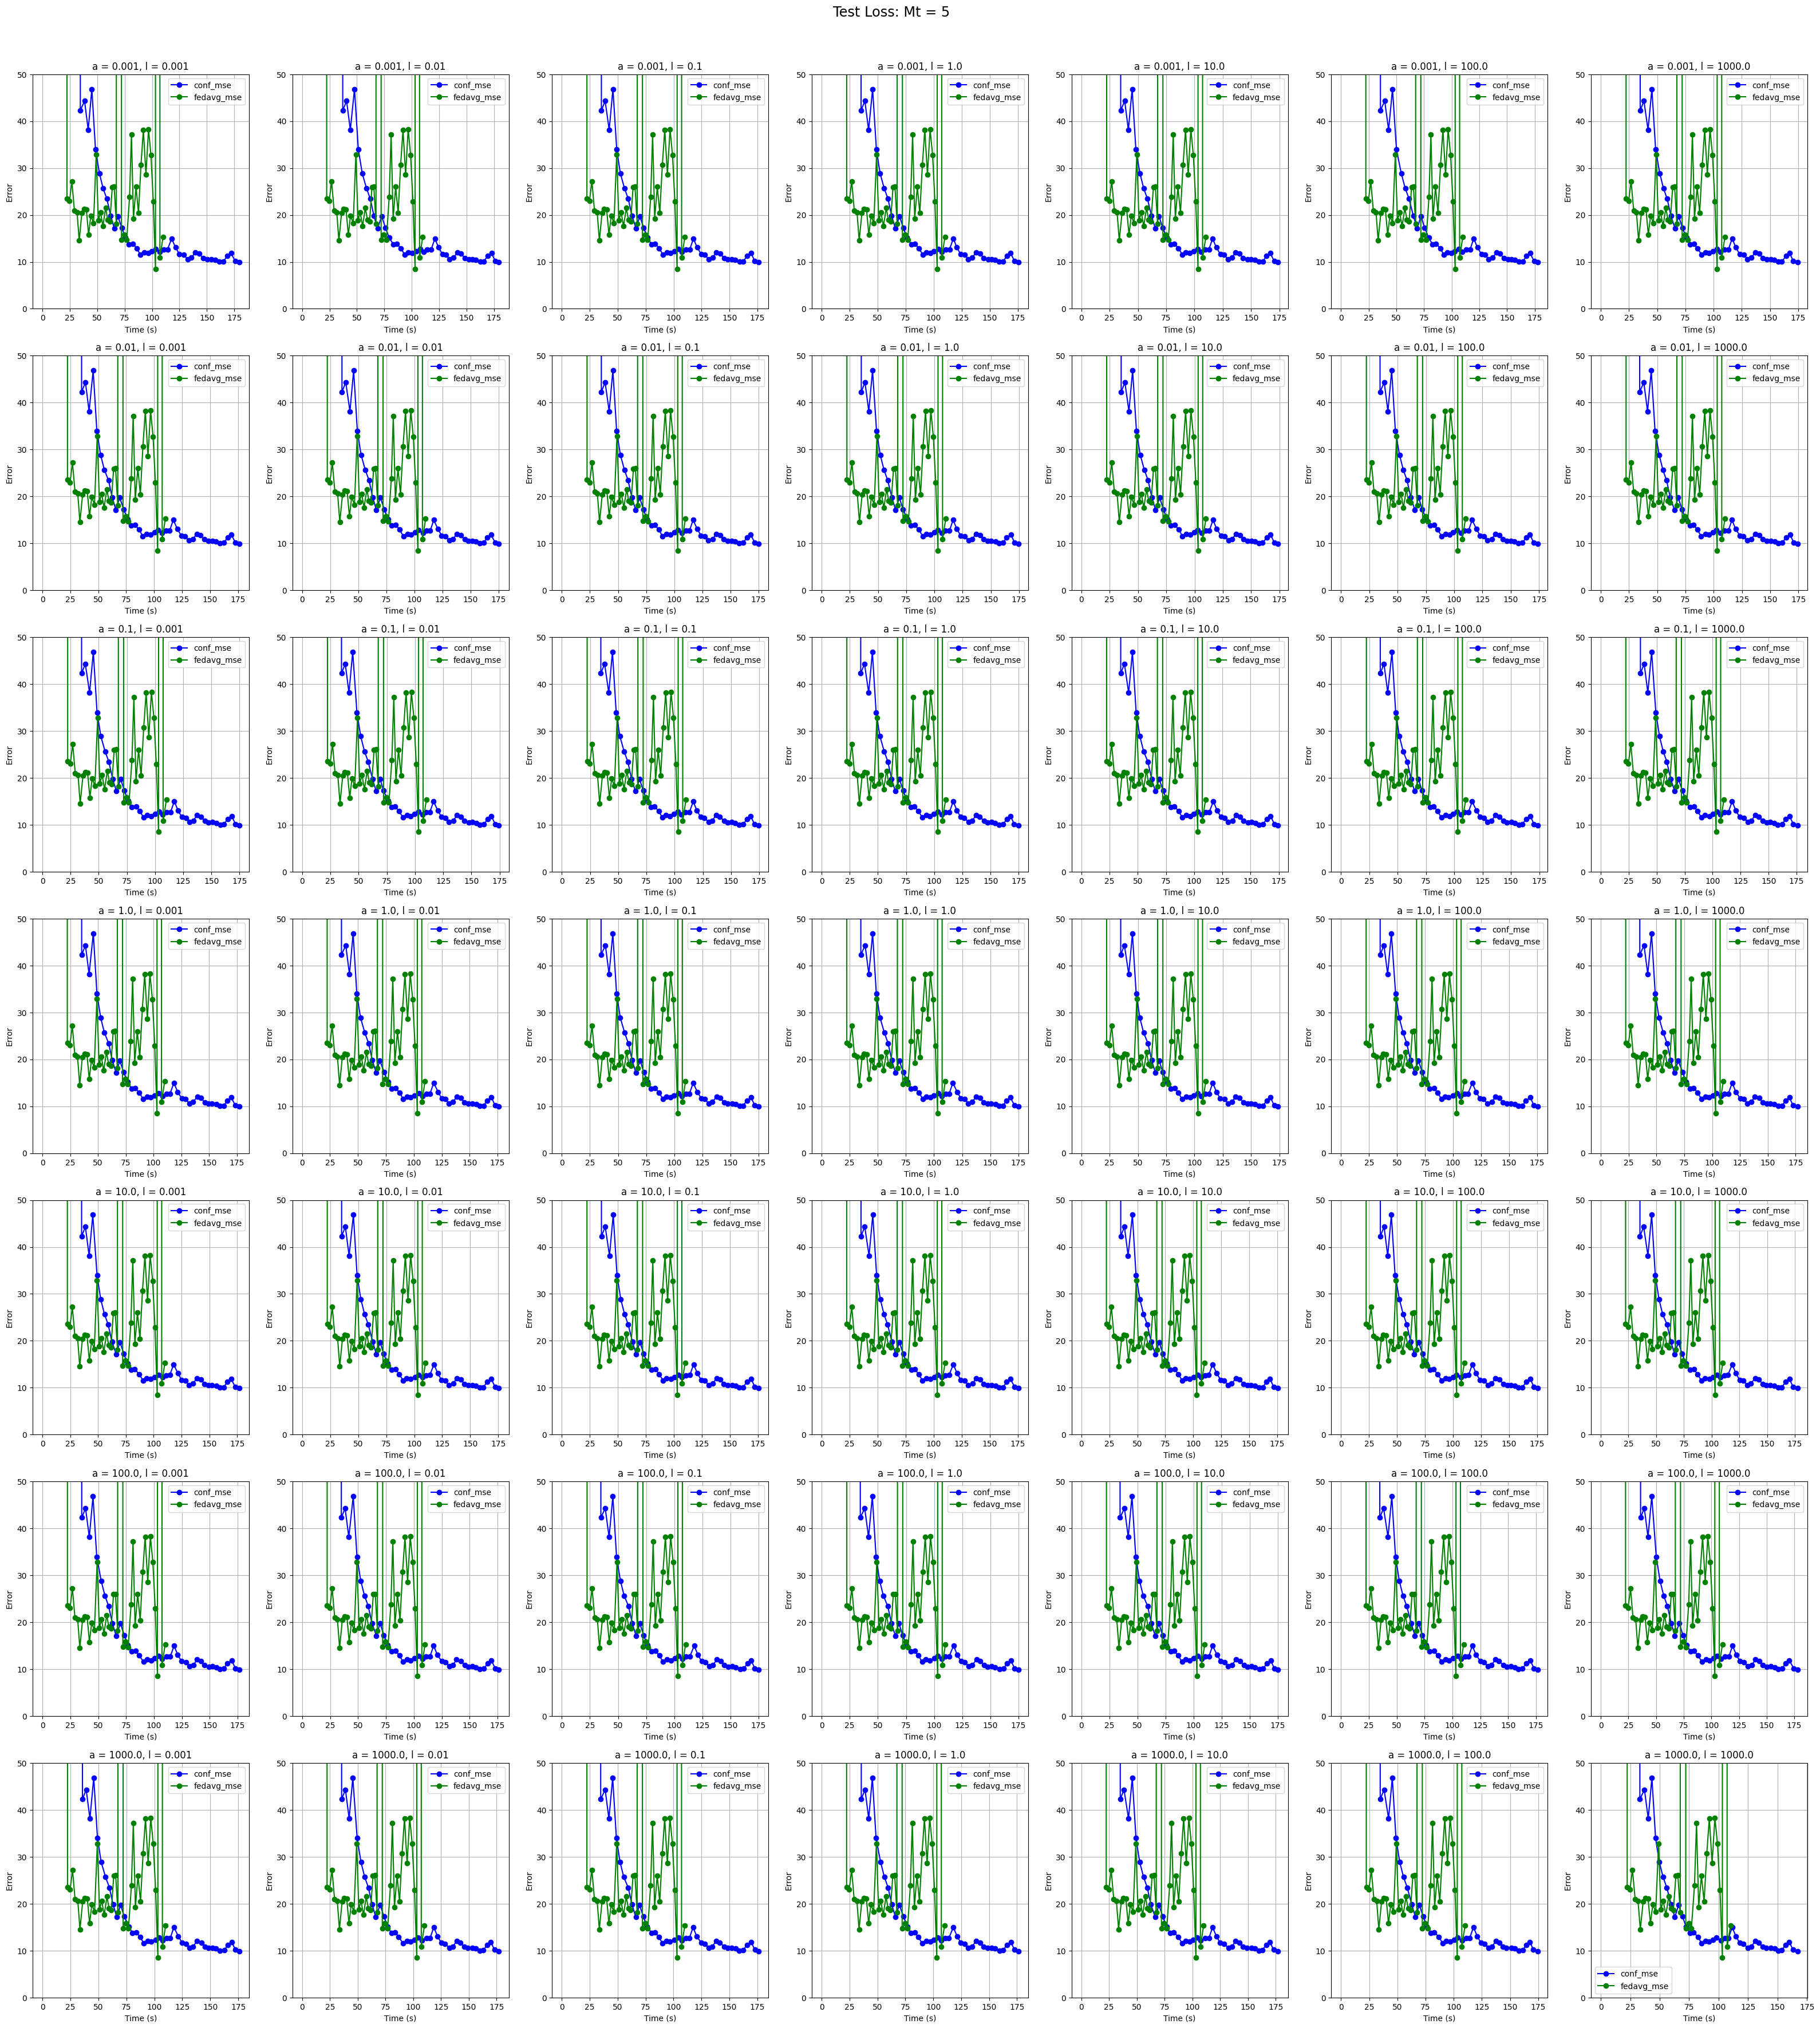

In [8]:
test.confeddi_gs_test_plots((40, 40), (0, 50))

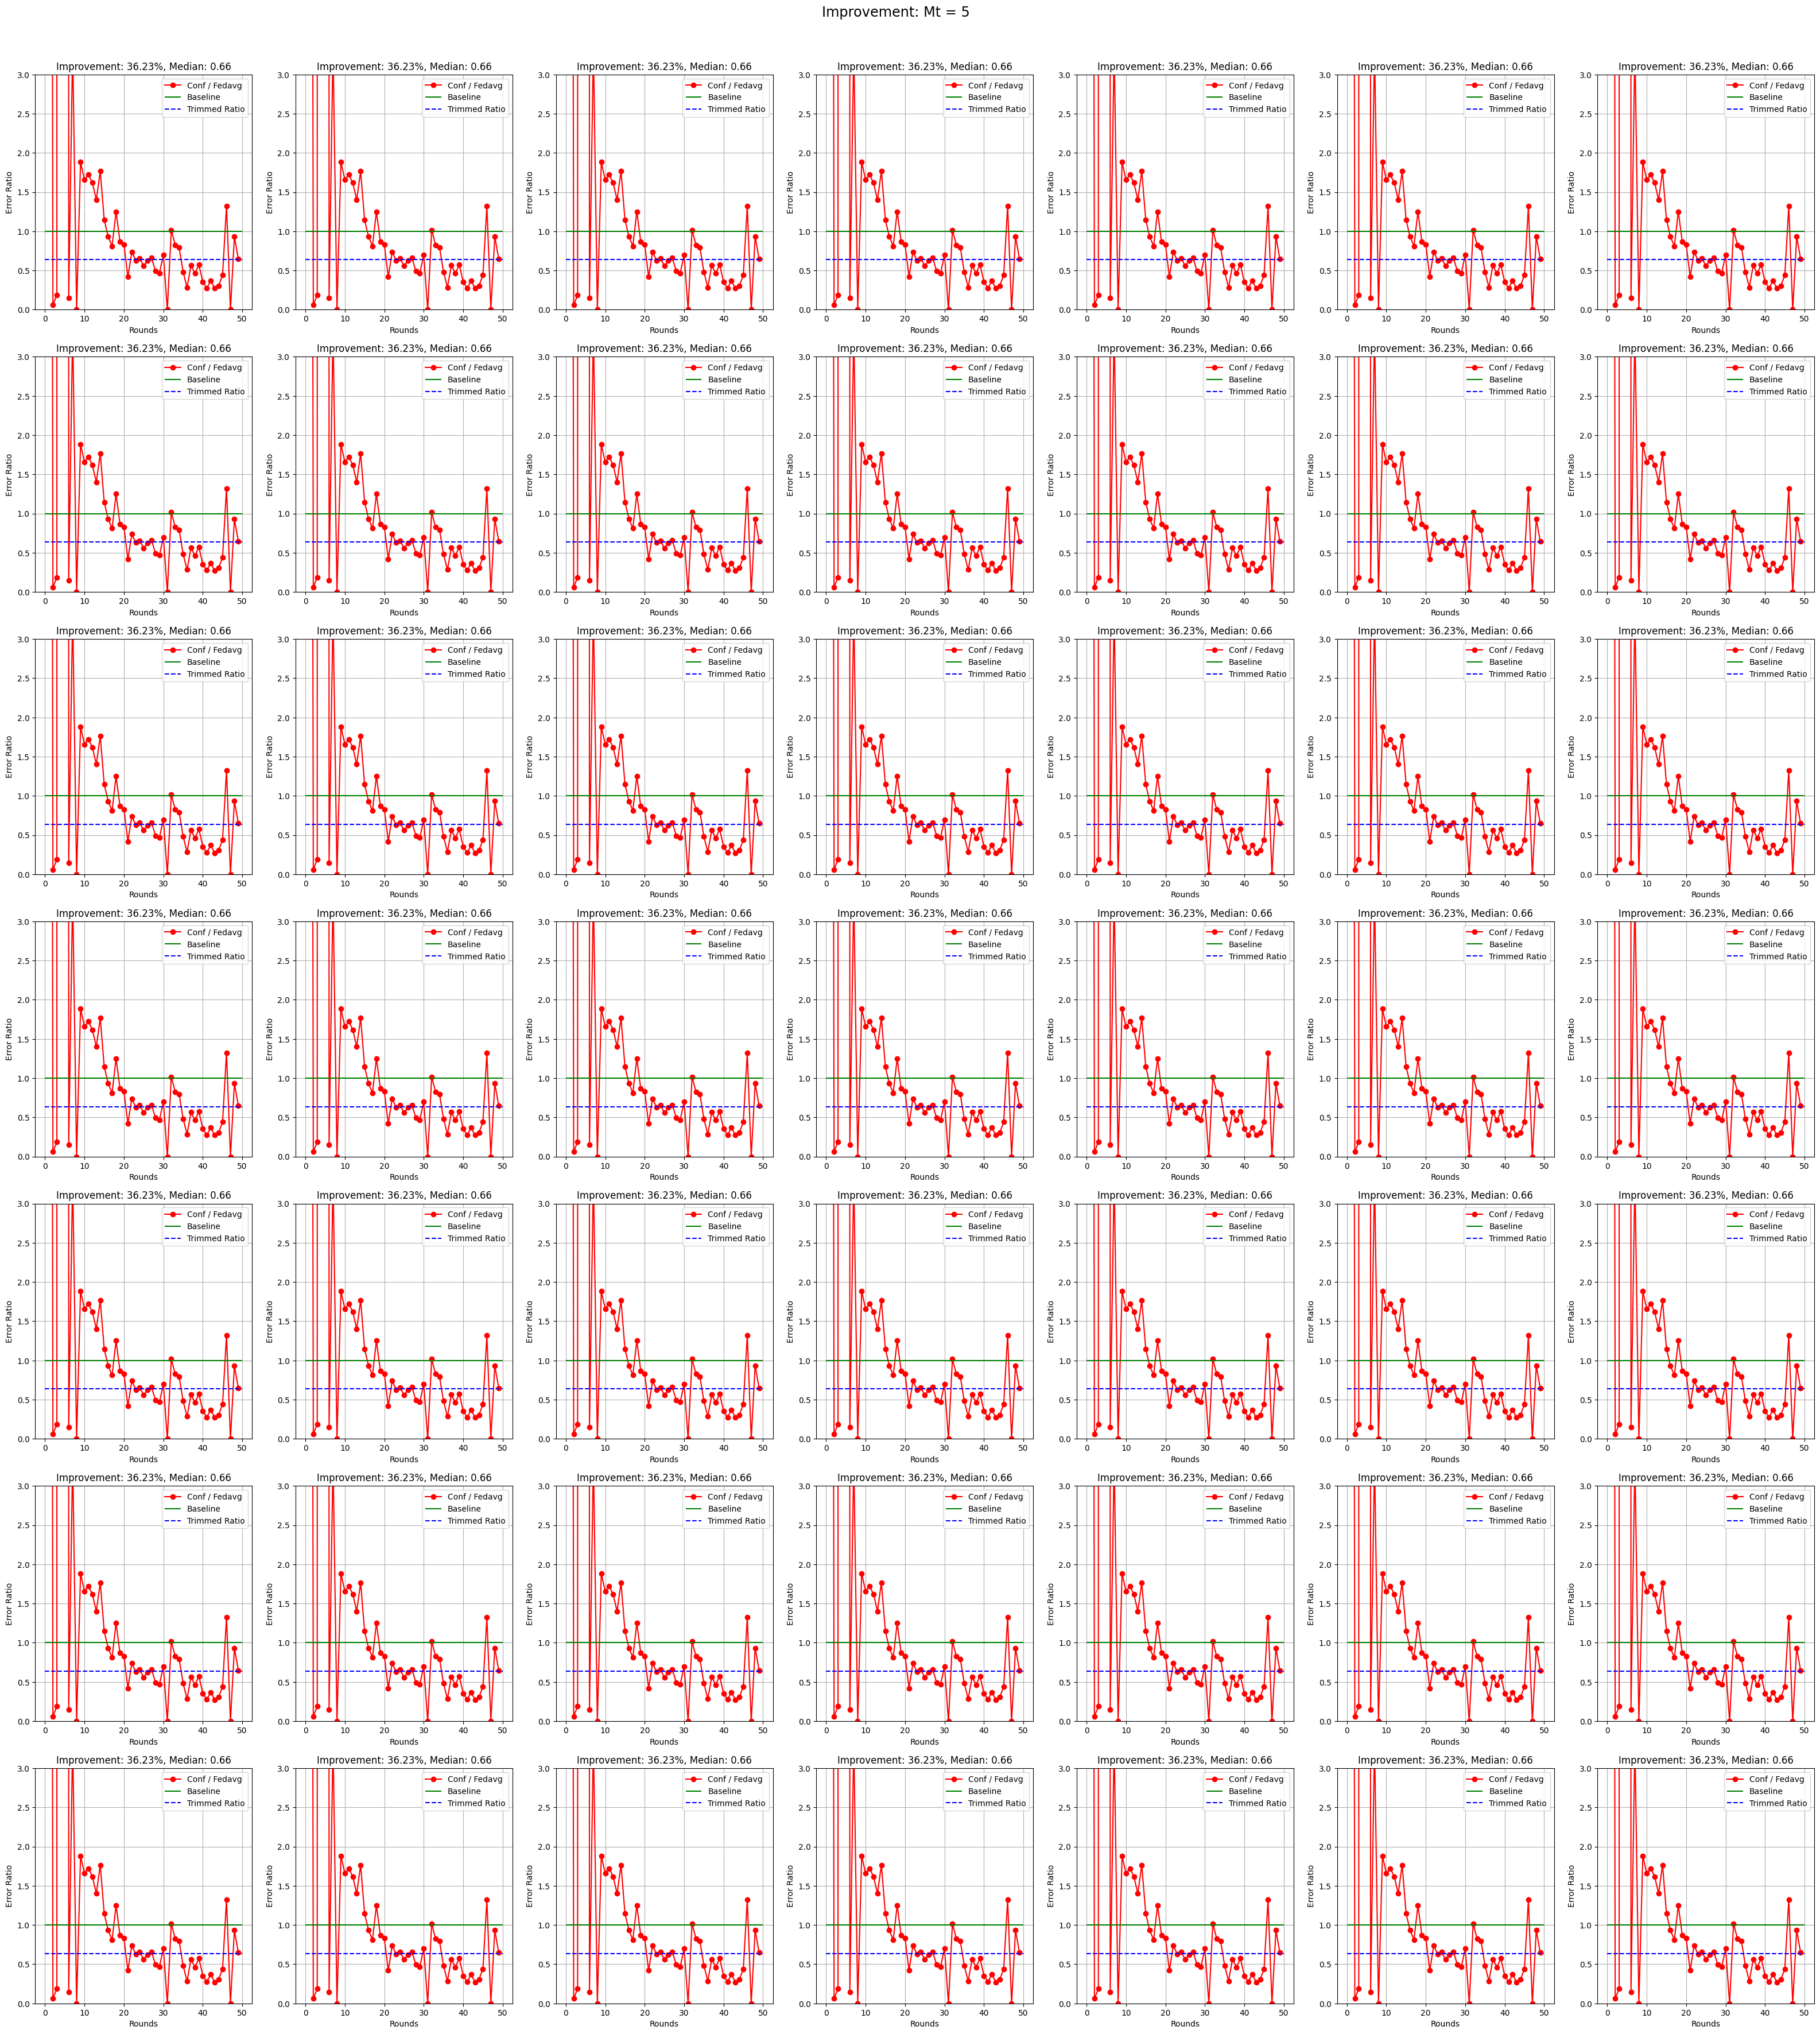

In [9]:
test.confeddi_gs_improvement_plots((40, 40), ylim = (0, 3), trim_bias = 1)

In [12]:
for w, b in gs_wb_history.values():
    test.average_error((w, b), 0)

Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.075480187118312
Avg Error: 2.0

In [13]:
alpha = [1000, 1]
lmbda = [0.1, 1000]
as_histories = []
wb_histories = []
context_combinations = [x for x in gen_power_set([0, 1, 2, 3, 4]) if x != []]

In [14]:
for a, l in zip(alpha, lmbda):
    wb_history = test.confeddi_as(context_combinations, a, l, rounds = 50)
    as_histories.append(test.conf_as_history)
    wb_histories.append(wb_history)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

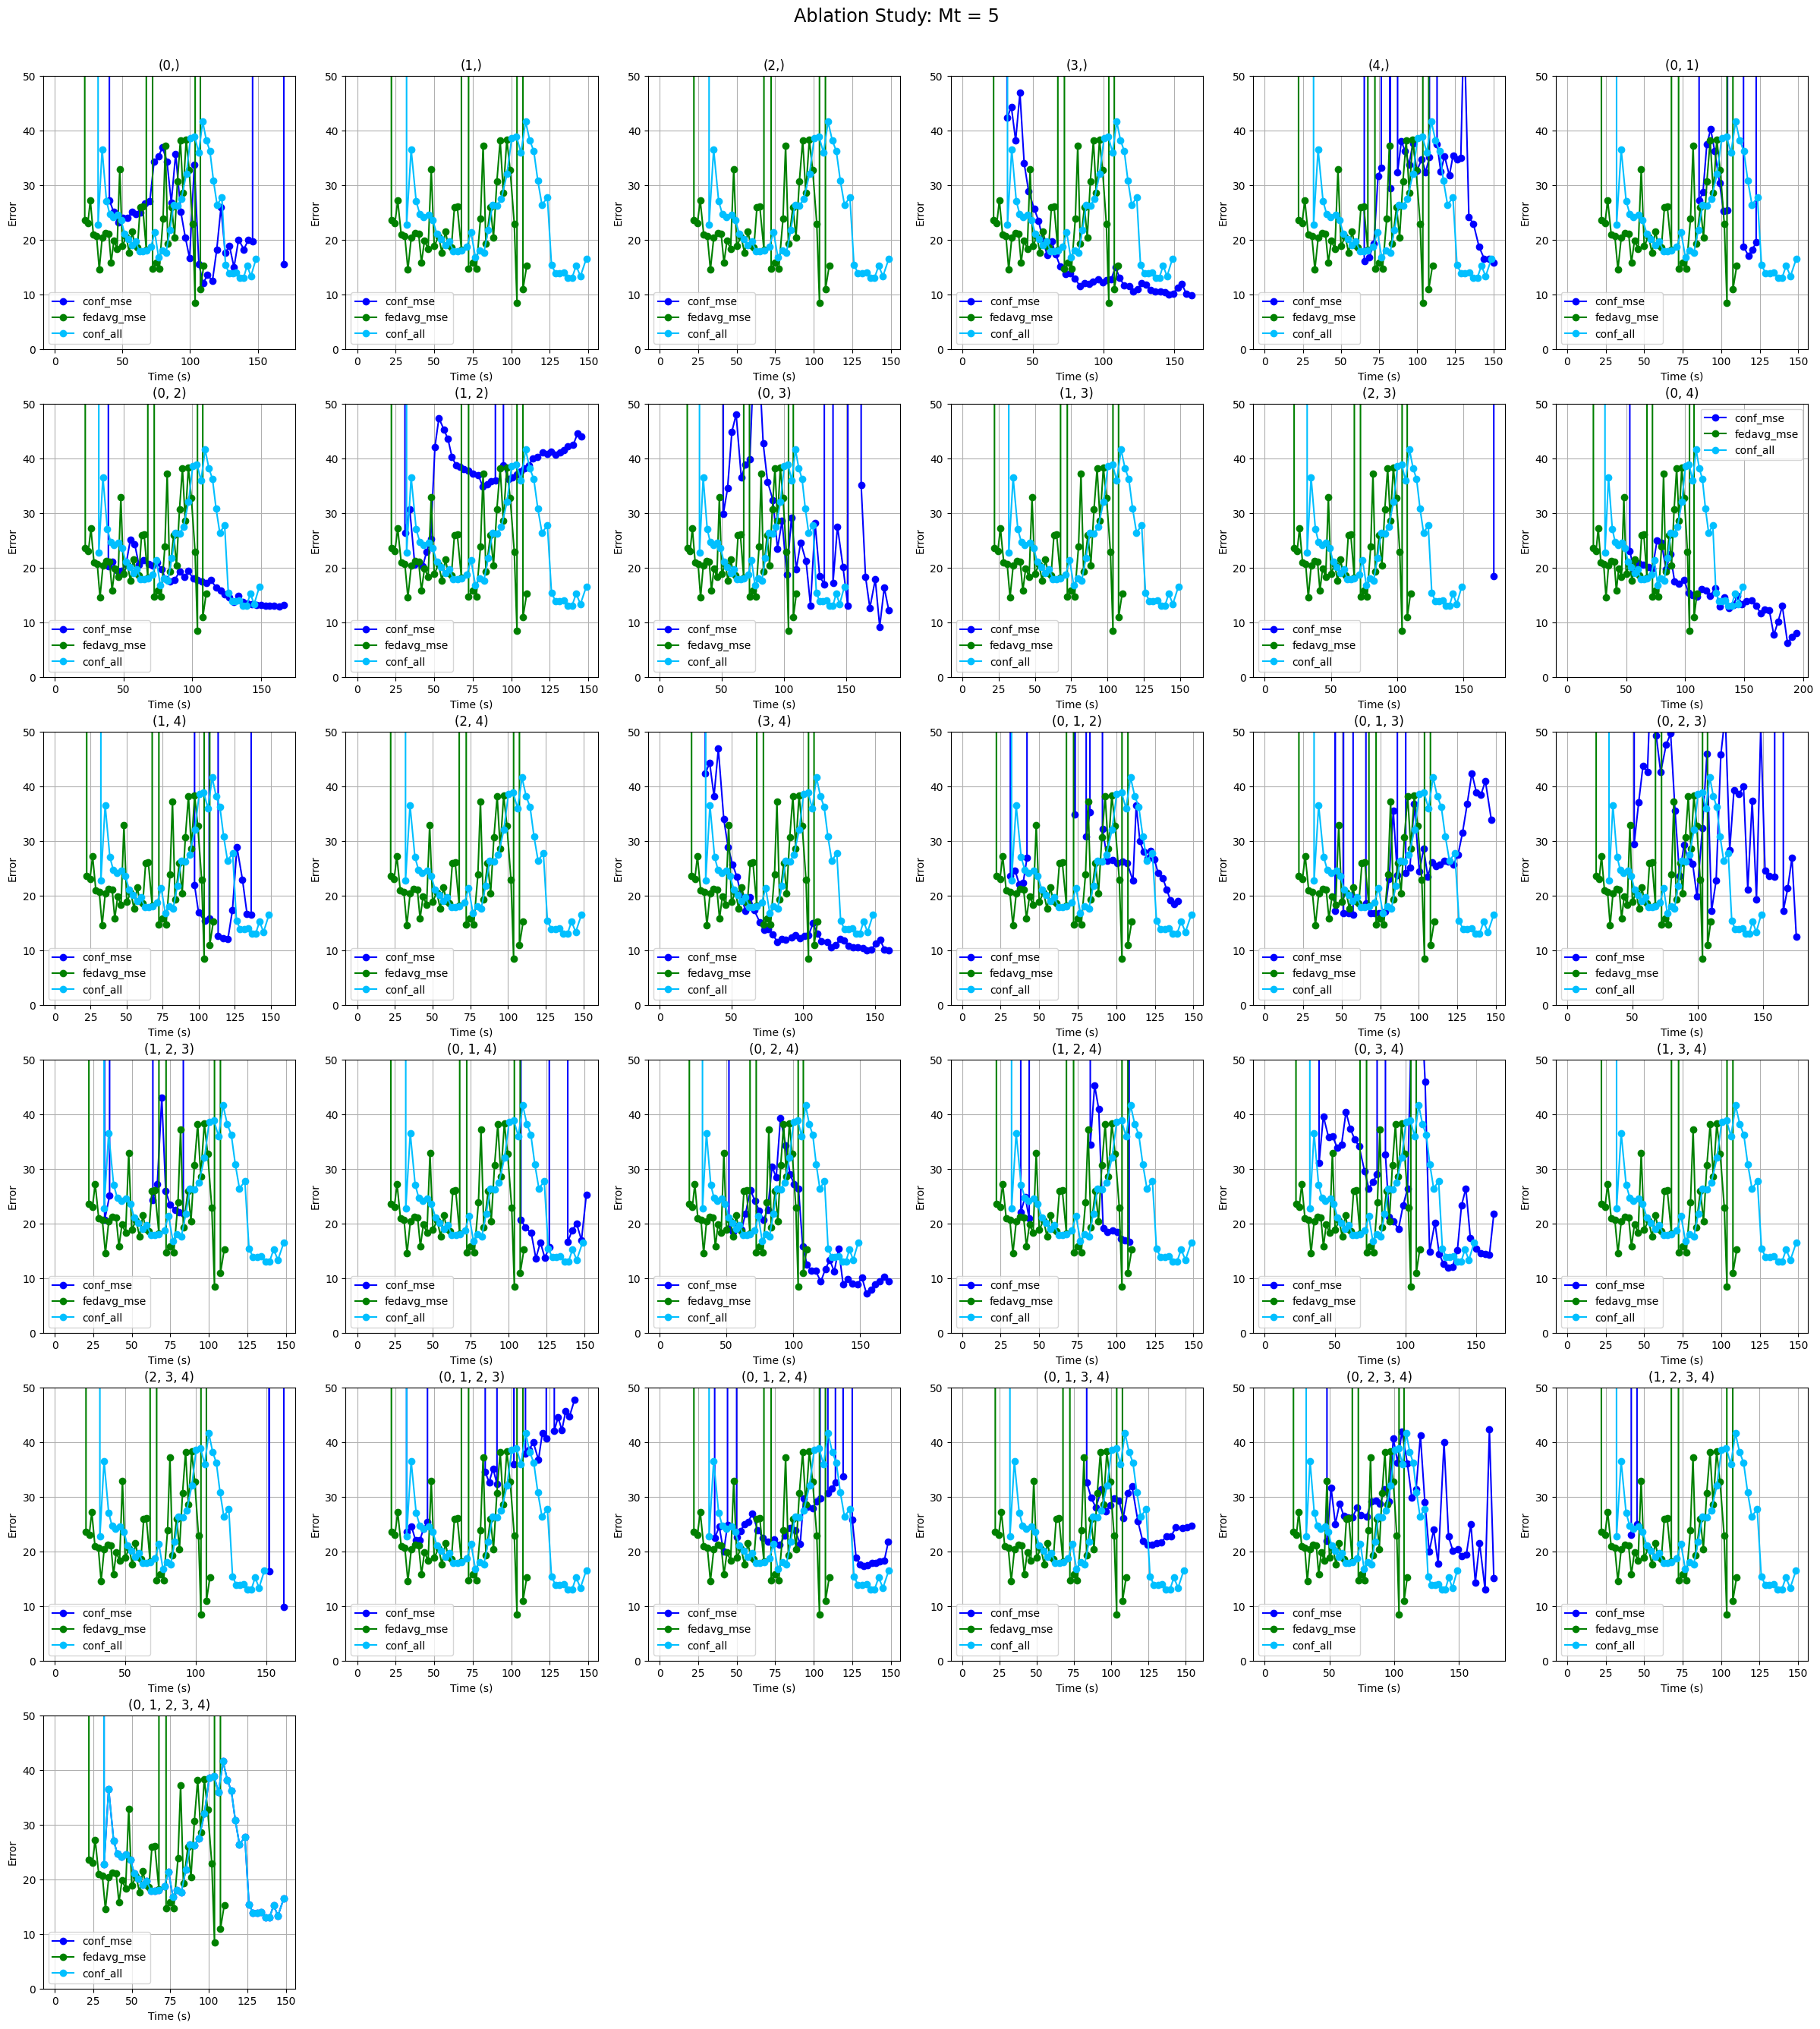

In [15]:
# a = 1000, l = 0.1
test.conf_as_history = as_histories[0]
test.confeddi_as_test_plots((30, 30), (0, 50), 6, 6, top = 0.95)

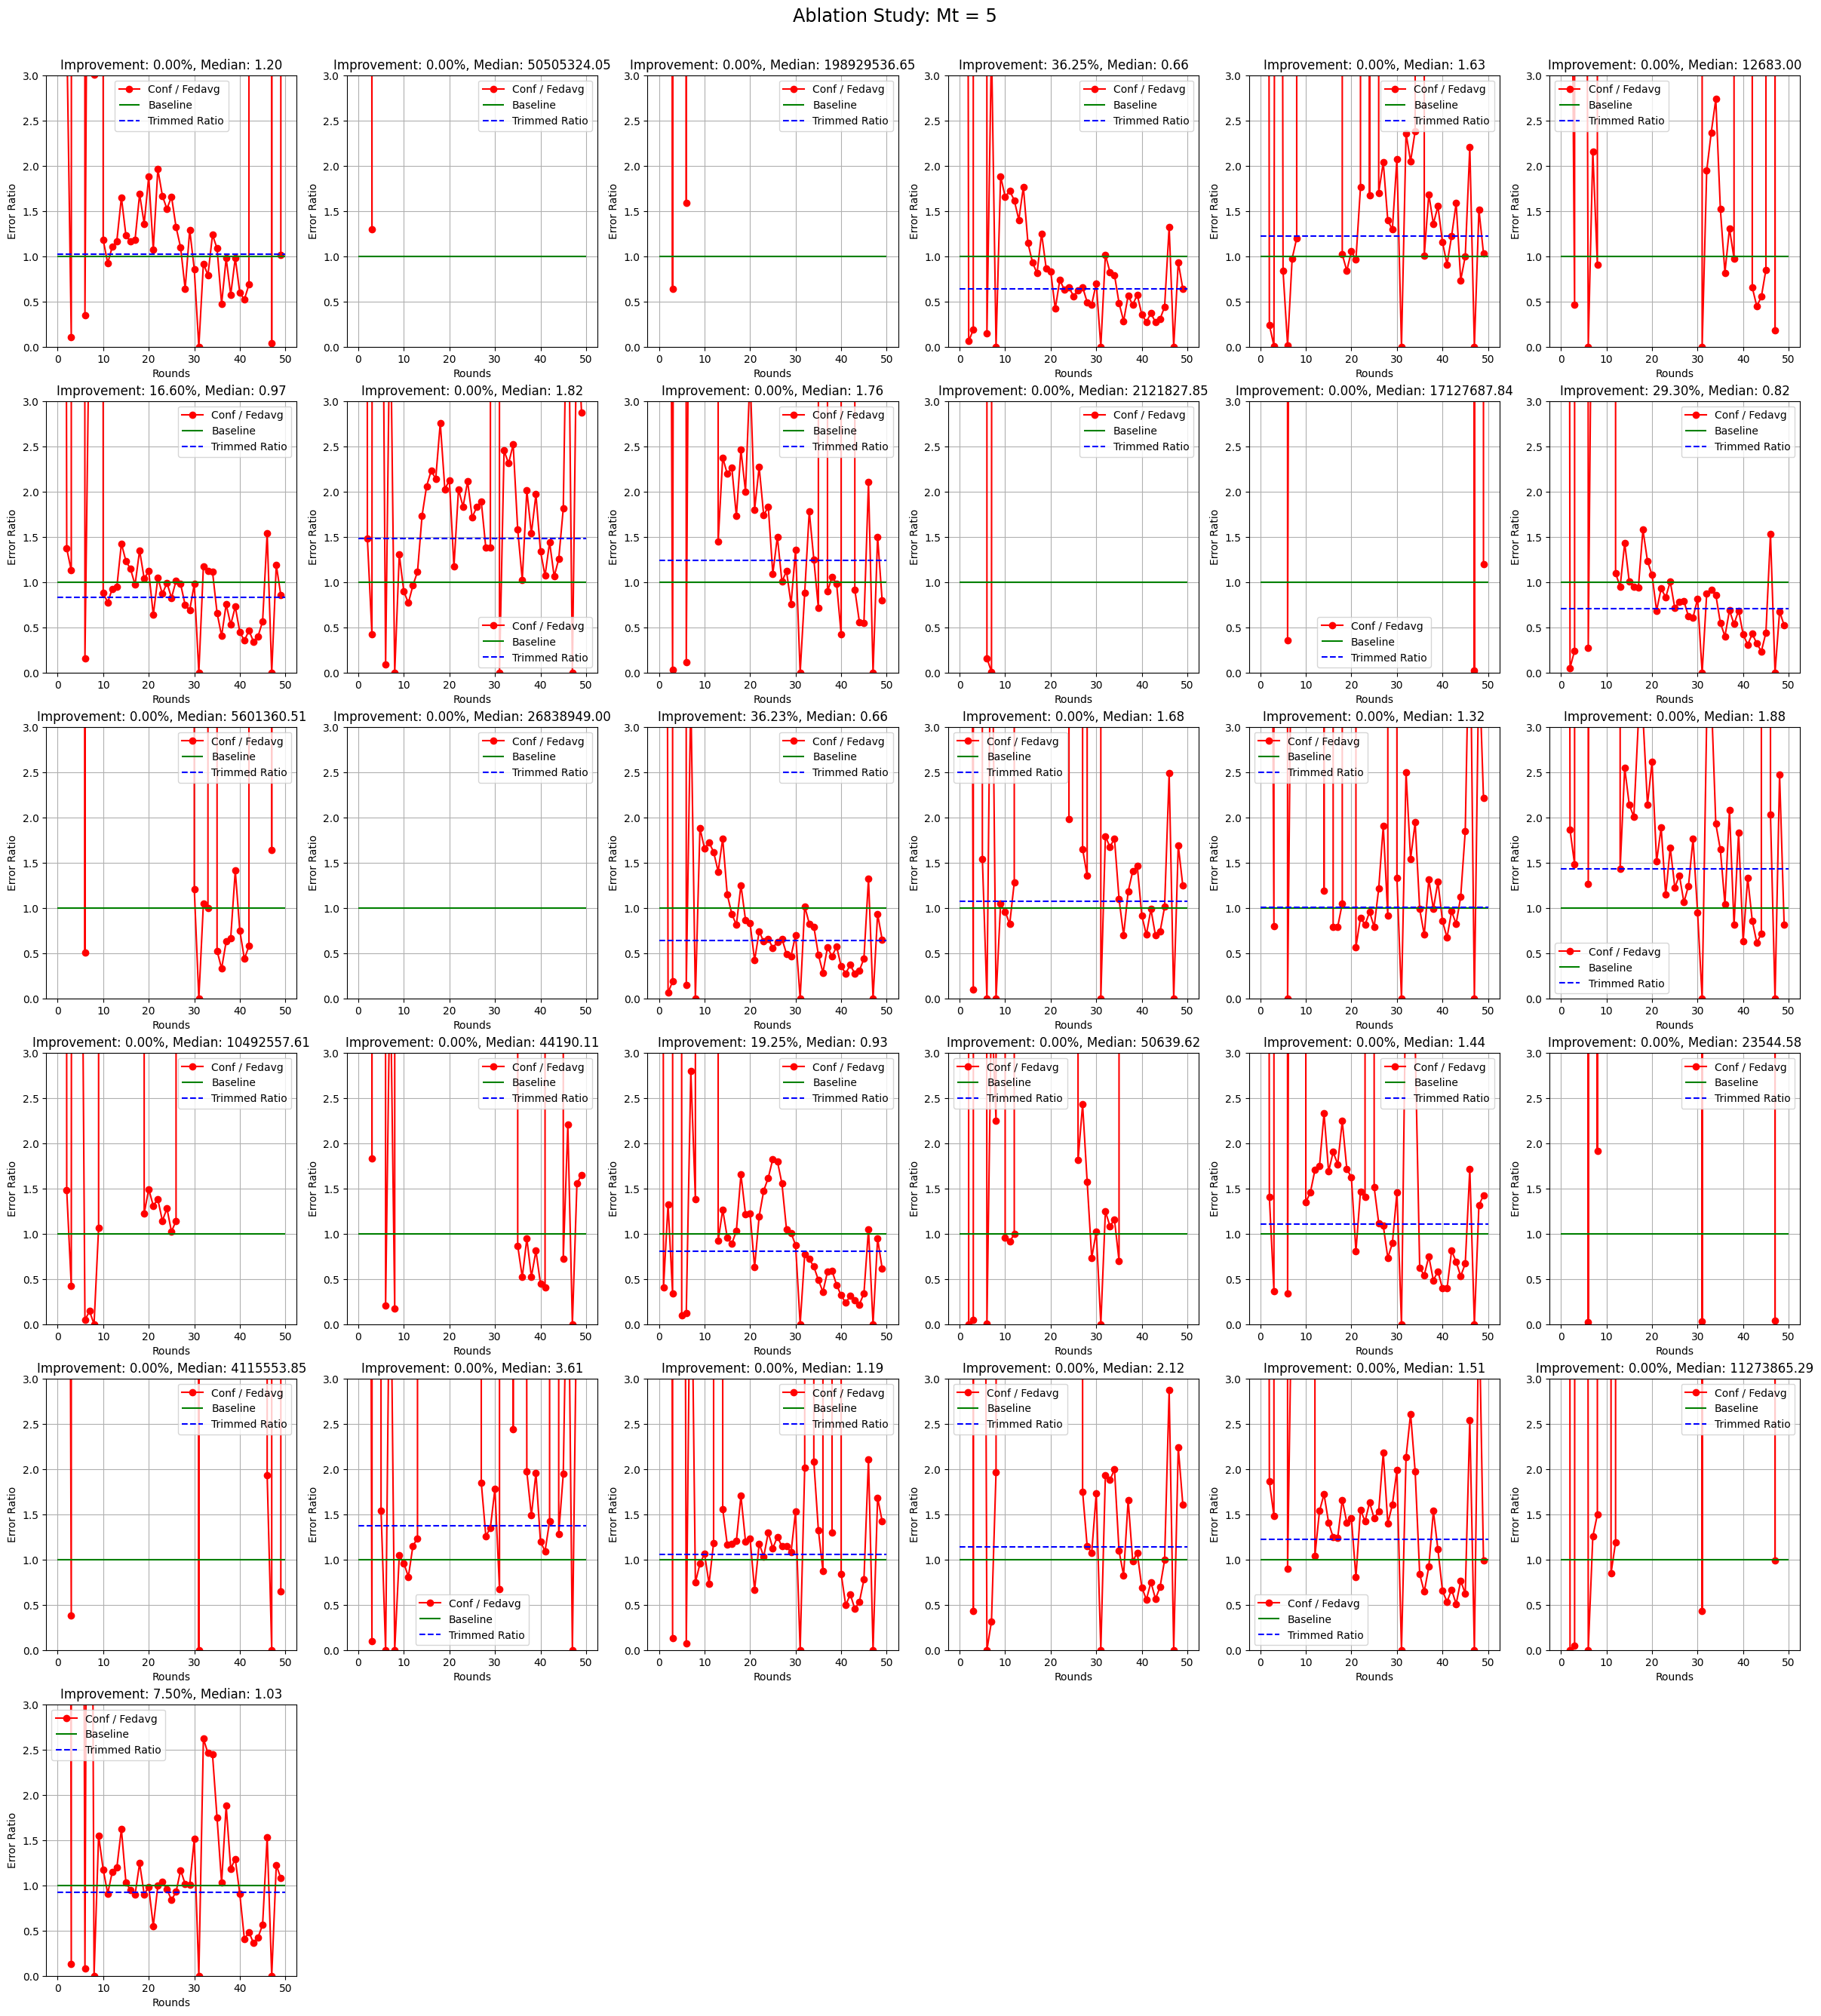

In [16]:
test.confeddi_as_improvement_plots((30, 30), 6, 6, ylim = (0, 3), trim_bias = 1, top = 0.95)

In [22]:
for w, b in wb_histories[0].values():
    test.average_error((w, b), 0)

Avg Error: 2.7946883409989316
Avg Error: 1215.0207836339346
Avg Error: 3544.380727618795
Avg Error: 2.0528526321494467
Avg Error: 2.7874641502165645
Avg Error: 519.5854474478857
Avg Error: 2.7627833933163415
Avg Error: 4.23526763273706
Avg Error: 2.5074606545189897
Avg Error: 178.69853729018163
Avg Error: 2.9763092178063175
Avg Error: 1.9045798009079915
Avg Error: 751.4326083884877
Avg Error: 1682.82257571951
Avg Error: 2.075480187118312
Avg Error: 3.2917253218734084
Avg Error: 3.9390123857192494
Avg Error: 2.6776358731933296
Avg Error: 3262.3134994284355
Avg Error: 3.83849082457415
Avg Error: 1.999983733256405
Avg Error: 843.0184389174065
Avg Error: 3.2373629102799835
Avg Error: 26.589230567491065
Avg Error: 2.3611173775177092
Avg Error: 5.286054628833965
Avg Error: 3.44538103132224
Avg Error: 3.025641953544577
Avg Error: 2.8302352780574793
Avg Error: 716.7086734068114
Avg Error: 3.0737041223582344


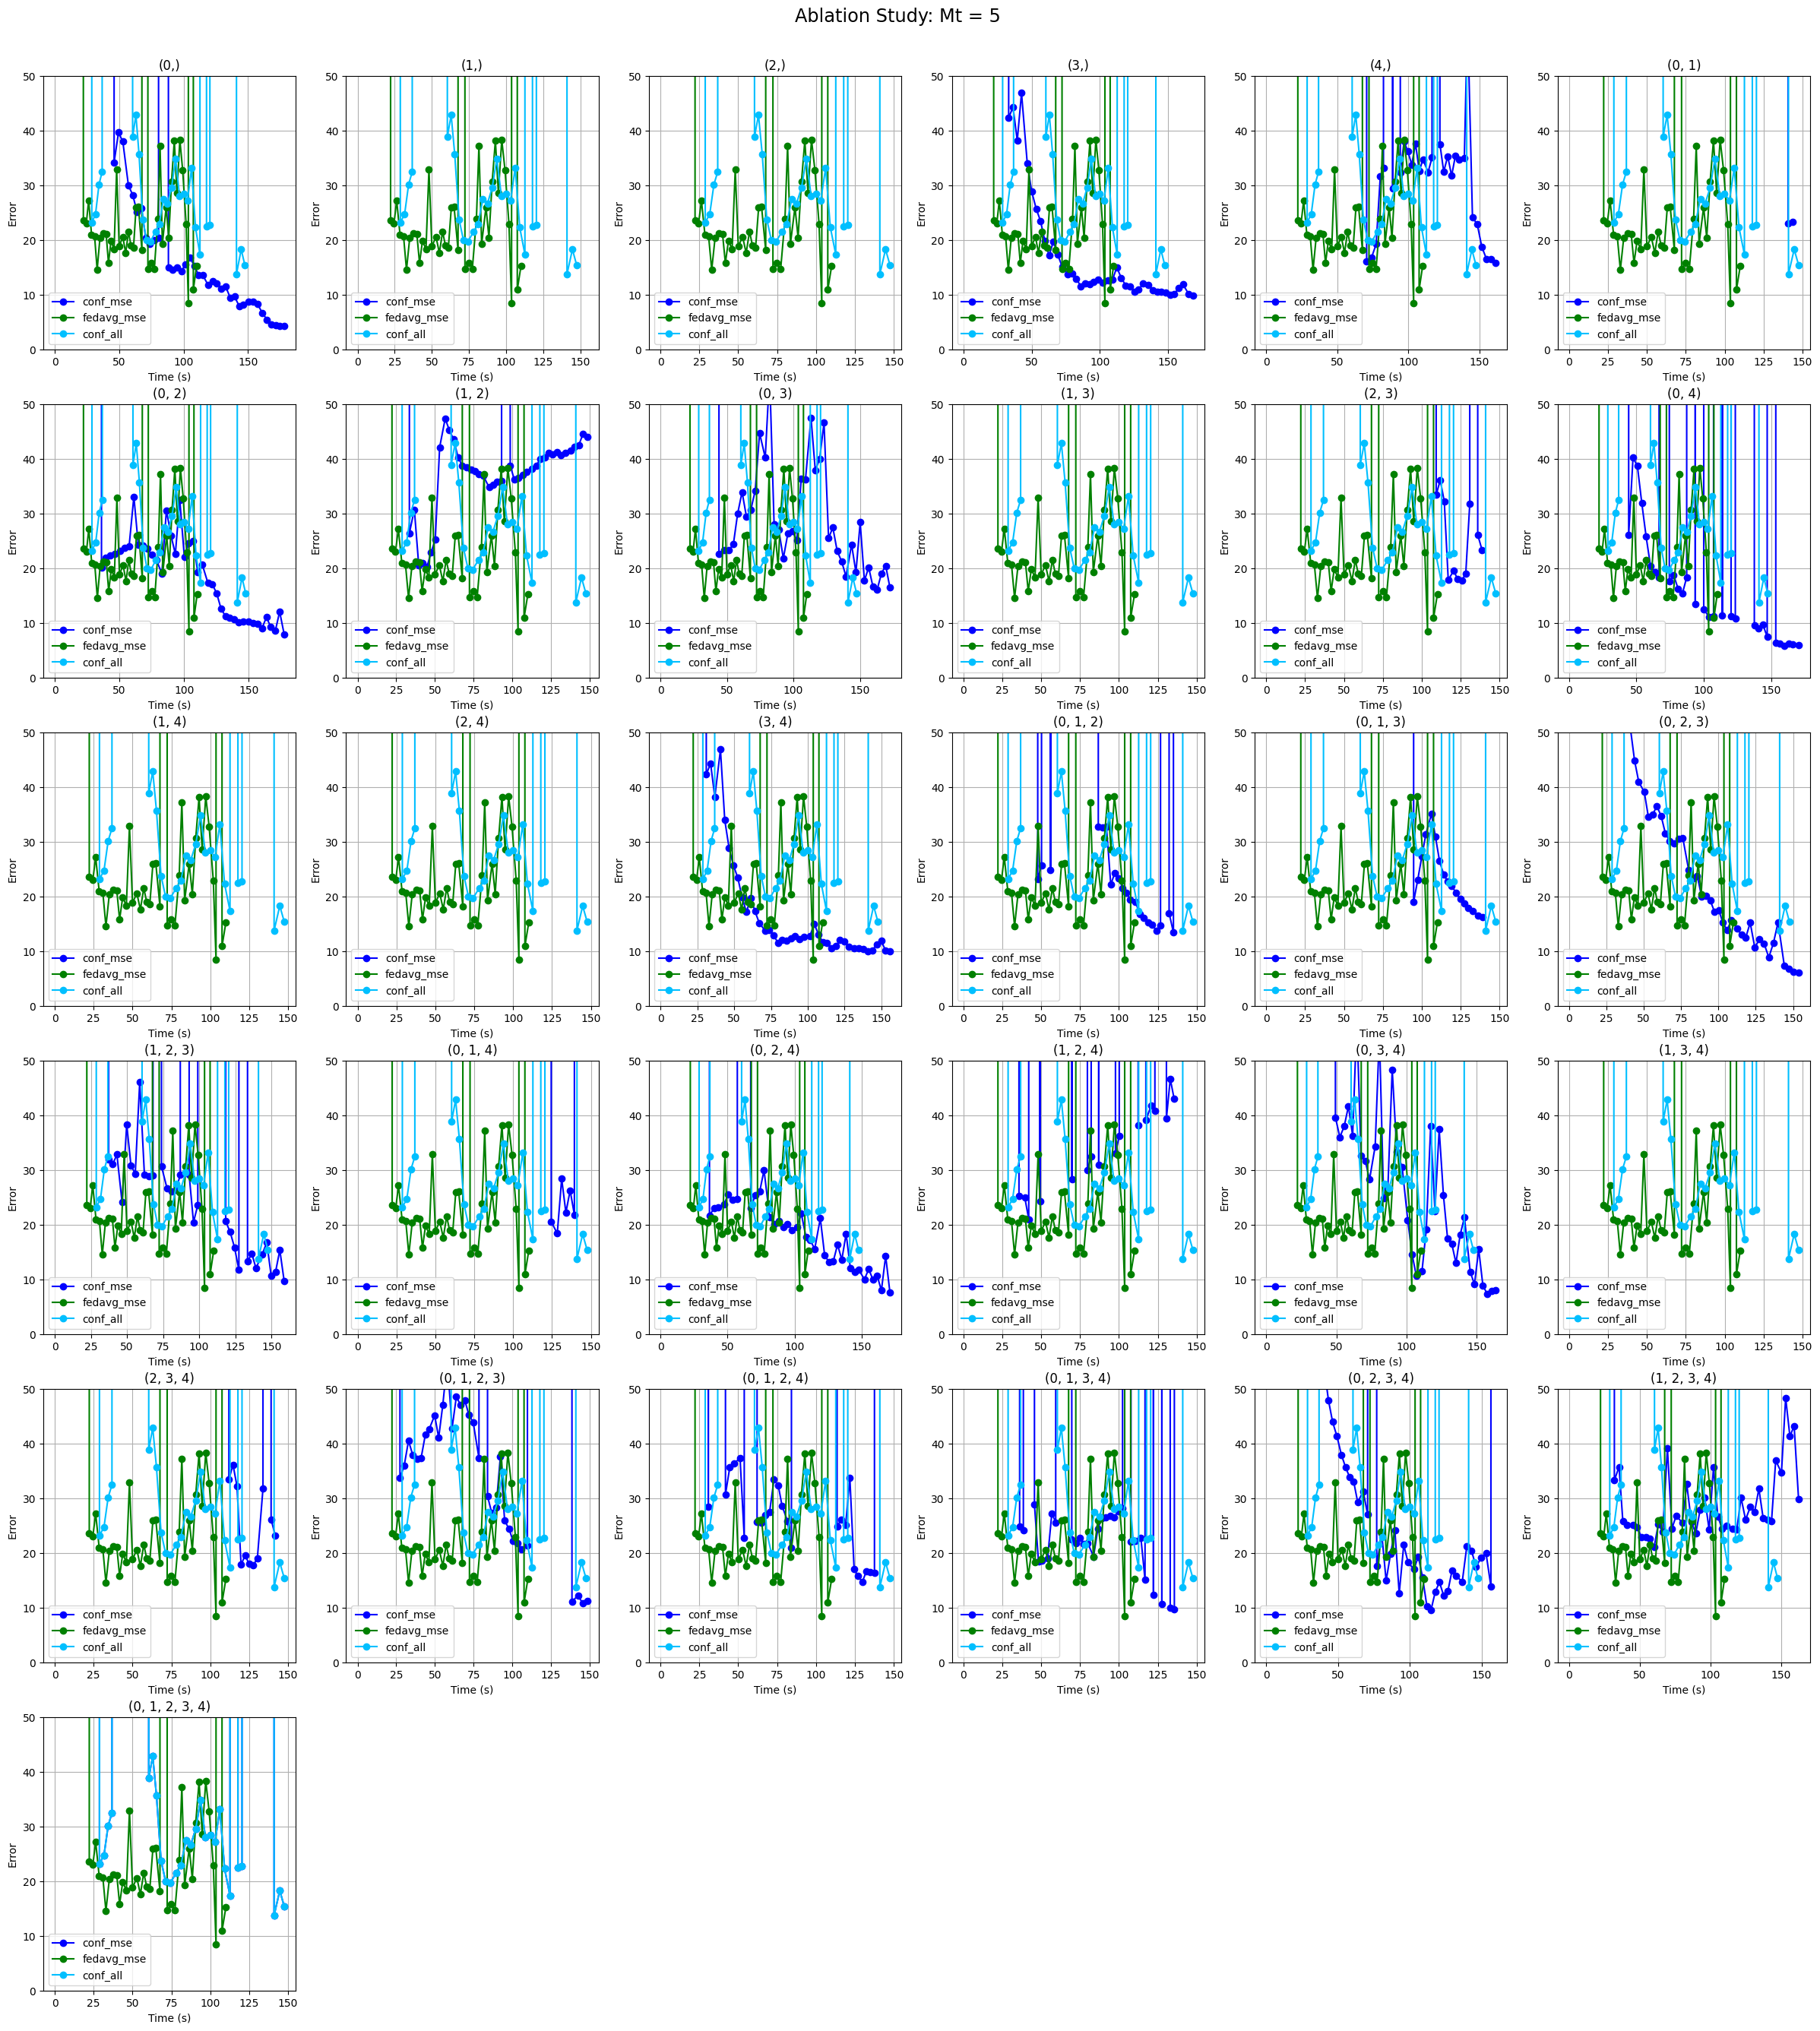

In [17]:
# a = 1, l = 1000
test.conf_as_history = as_histories[1]
test.confeddi_as_test_plots((30, 30), (0, 50), 6, 6, top = 0.95)

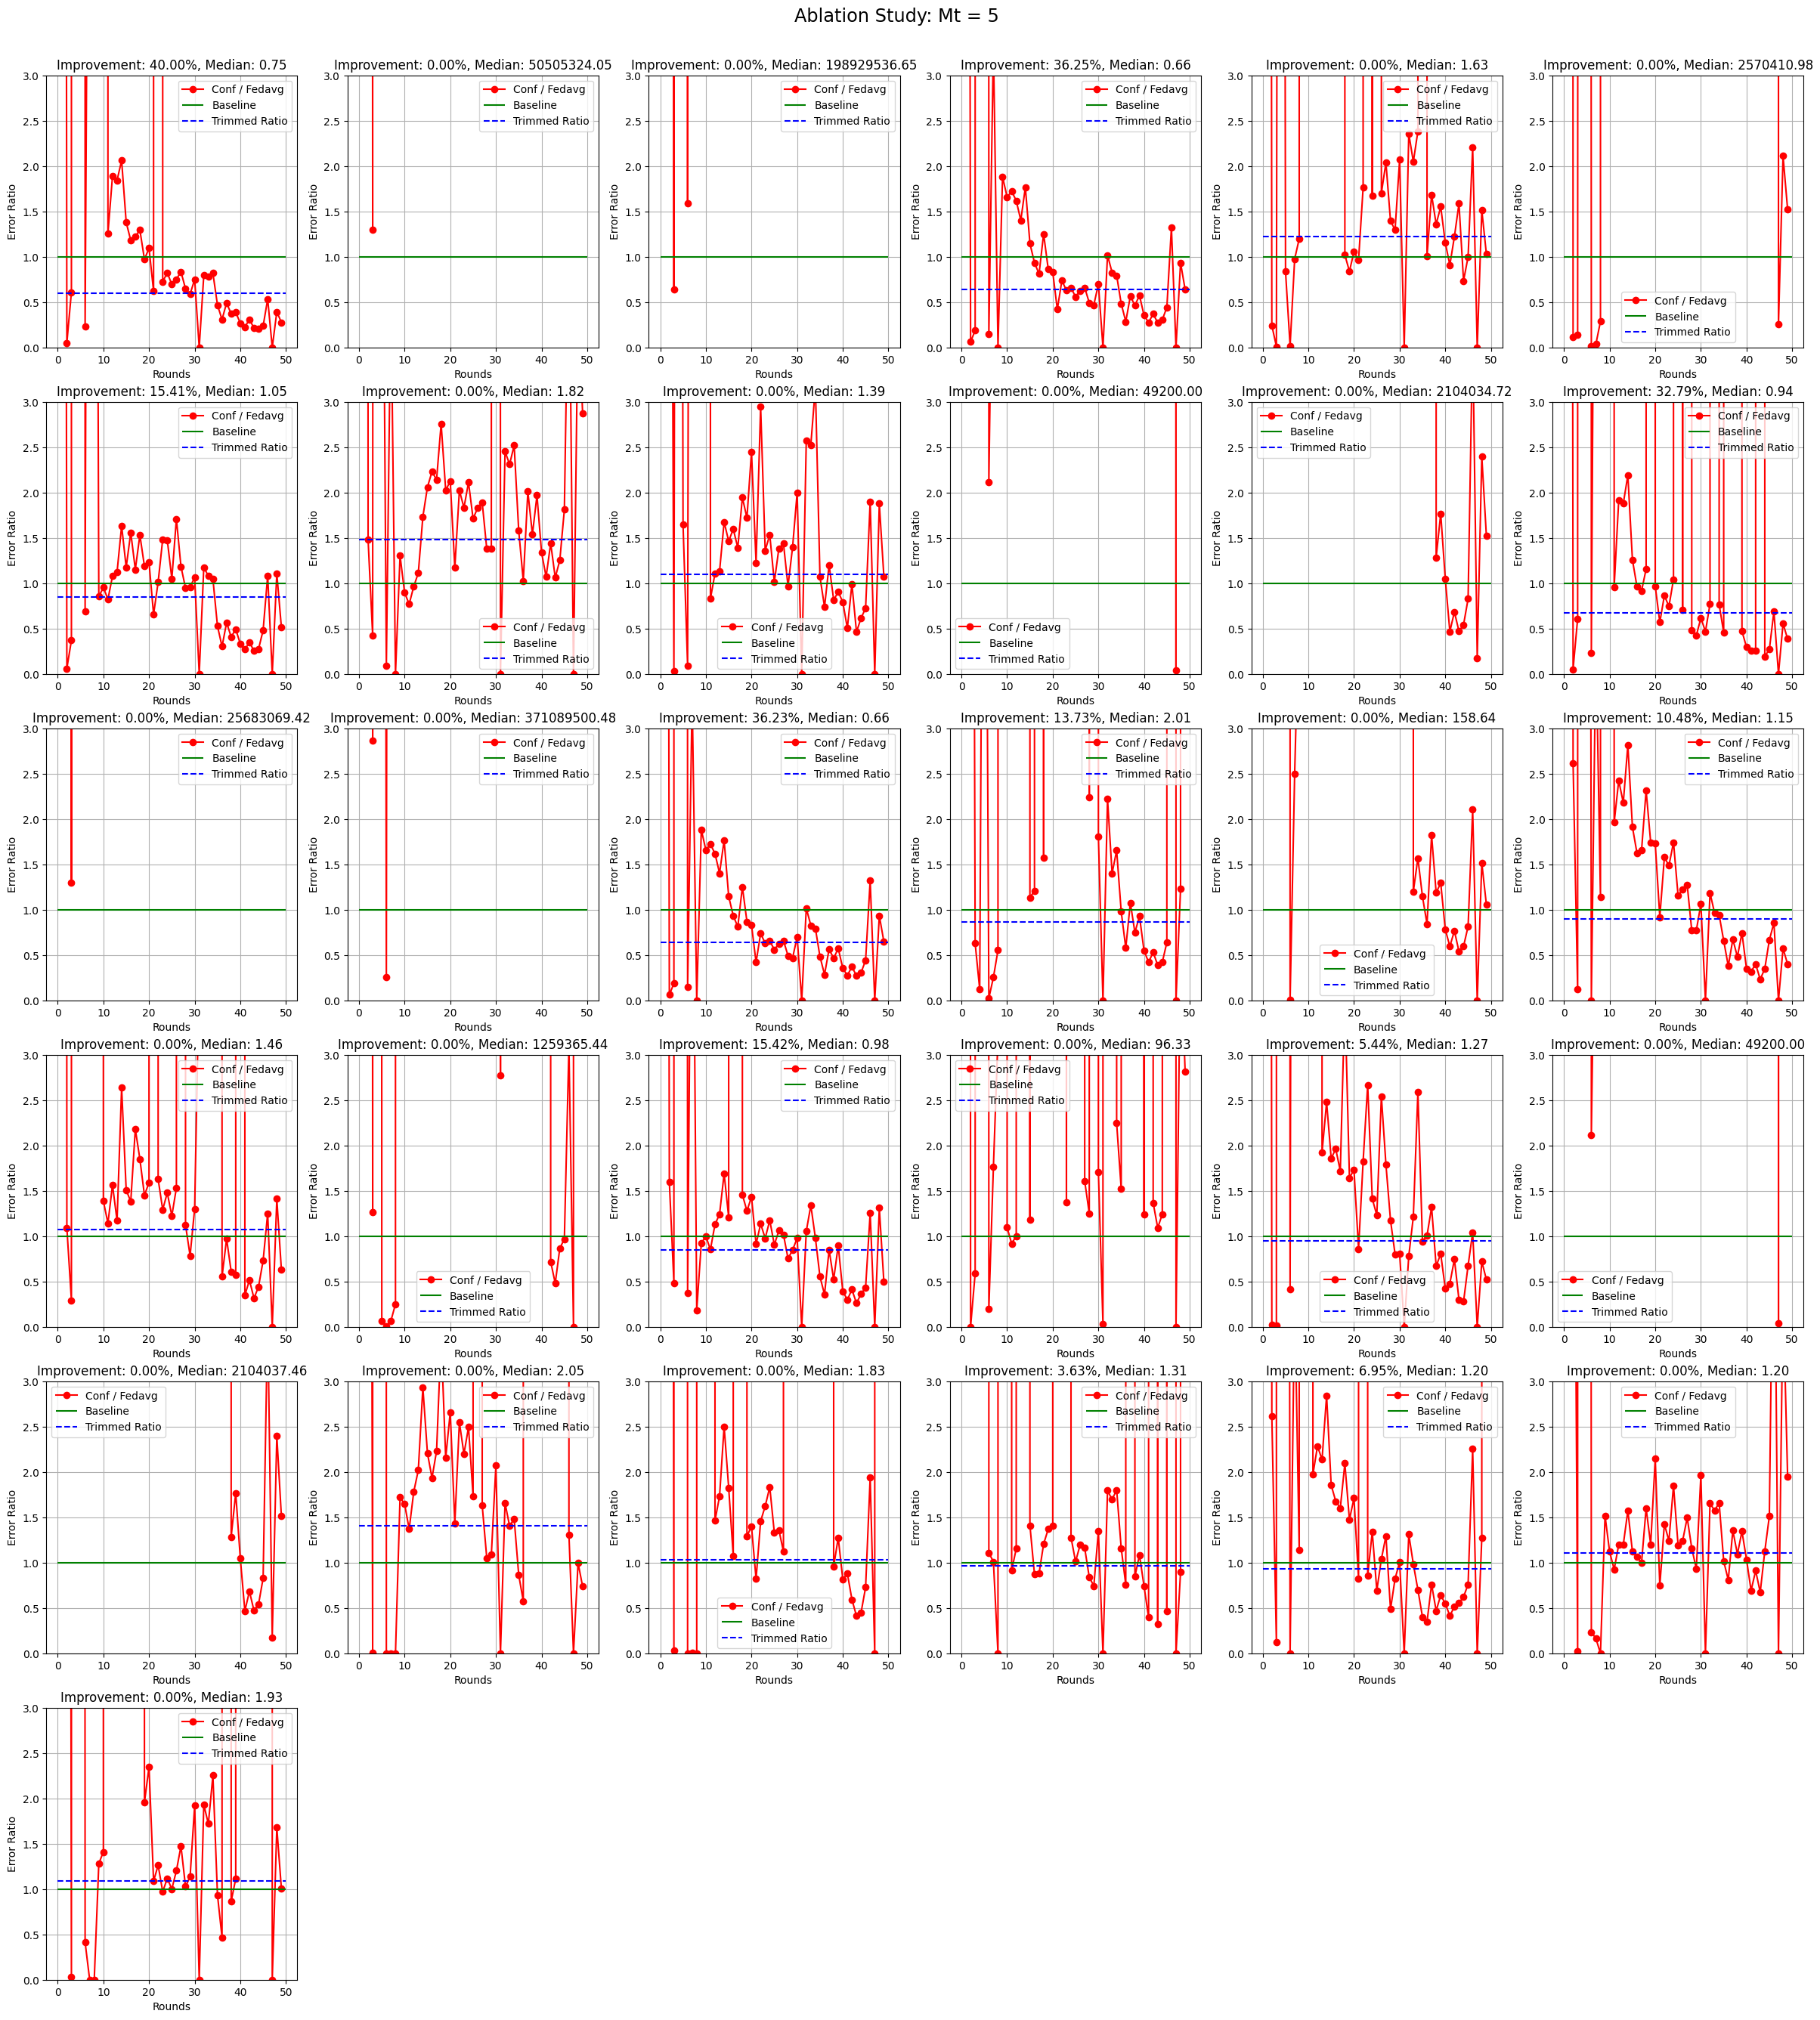

In [18]:
test.confeddi_as_improvement_plots((30, 30), 6, 6, ylim = (0, 3), trim_bias = 1, top = 0.95)

In [23]:
for w, b in wb_histories[1].values():
    test.average_error((w, b), 0)

Avg Error: 1.3866962112907575
Avg Error: 1215.0207836339346
Avg Error: 3544.380727618795
Avg Error: 2.0528526321494467
Avg Error: 2.7874641502165645
Avg Error: 3.3714482813239246
Avg Error: 1.9637211431311594
Avg Error: 4.23526763273706
Avg Error: 2.963977722300405
Avg Error: 100.57213940591974
Avg Error: 3.011094167322148
Avg Error: 1.6223814579572113
Avg Error: 927.8583286995546
Avg Error: 6919.890433271469
Avg Error: 2.075480187118312
Avg Error: 1554.2862446705435
Avg Error: 3.0424036651331976
Avg Error: 1.768541725770538
Avg Error: 2.2641295827540775
Avg Error: 74.24033536638566
Avg Error: 1.9362804986874176
Avg Error: 5.048714501555532
Avg Error: 1.9143904756524945
Avg Error: 100.57213940591974
Avg Error: 2.966526659957797
Avg Error: 2.4145022803508818
Avg Error: 270.61658657170415
Avg Error: 55.69285476116219
Avg Error: 136.6036348112802
Avg Error: 3.5949263664204714
Avg Error: 2.7617377623026944


In [19]:
# (3,), (3, 4), (0, 2, 4)